# <center> Implement LeNet Model on Minst Dataset </center>

### 1998-LeNet CNN with Keras:
** Deep Learning Models Implementations **
#### Dataset Source:  https://www.kaggle.com/c/digit-recognizer/data
    - Classes : 10 {0,1,2,3,4,5,6,7,8,9}
    - Dataset shape :60,000 [42000/28000]
    - Image shape : 28*20*1 (Gray Scale)
    - EDA : Counting Classes / Data Distribution
- Problem type :
    - Image Classification 

In [1]:
#Import Necessary lib 
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#Load training dataset
df_train = pd.read_csv('train.csv')
df_train.shape

(42000, 785)

In [3]:
#Seperate dataset and target variables
x_train = df_train.iloc[:, 1:]
print("training shape : ",x_train.shape)
y_train = df_train.iloc[:, 0]
print("target shape : ",y_train.shape)

training shape :  (42000, 784)
target shape :  (42000,)


In [4]:
#Any dataset can be preprocessed before using training models : Normalize
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train/255

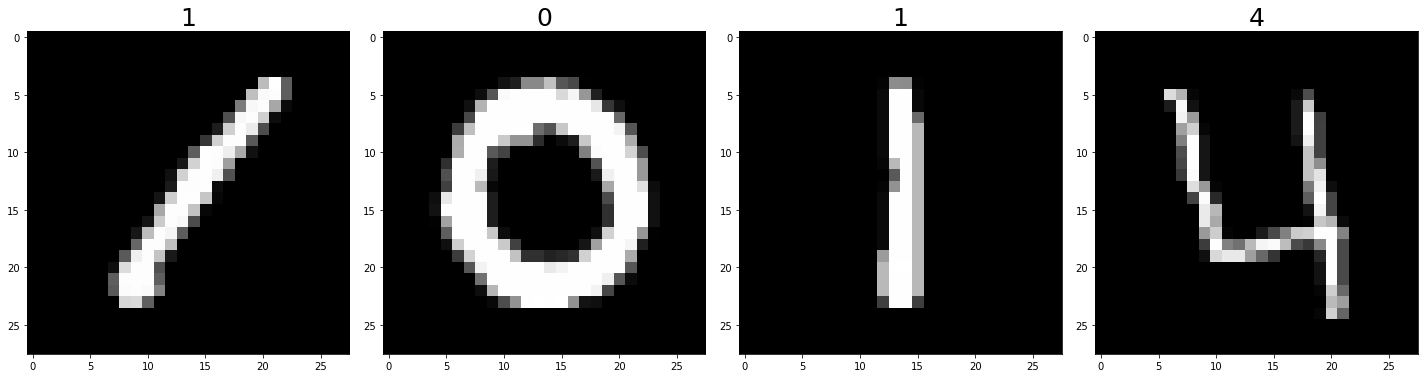

In [5]:
#Plot and check datapoints
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.tight_layout()
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i],size = (25))
plt.show()

In [6]:
from collections import Counter
print(Counter(y_train))

Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


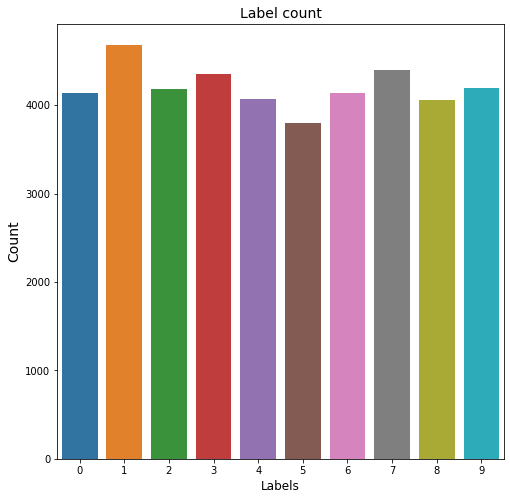

In [7]:
#https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_train)
ax.set_title('Label count', fontsize=14)
ax.set_xlabel('Labels', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 84)                21588     
__________

In [10]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [11]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(x_train, y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [12]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [14]:
history = model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, epochs=10, validation_data=(X_val, T_val))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
408/407 [==============================] - 17s 41ms/step - loss: 0.6149 - acc: 0.8108 - val_loss: 0.1579 - val_acc: 0.9508
Epoch 2/10
408/407 [==============================] - 15s 38ms/step - loss: 0.1992 - acc: 0.9385 - val_loss: 0.1177 - val_acc: 0.9635
Epoch 3/10
408/407 [==============================] - 15s 38ms/step - loss: 0.1550 - acc: 0.9527 - val_loss: 0.0837 - val_acc: 0.9722
Epoch 4/10
408/407 [==============================] - 16s 38ms/step - loss: 0.1265 - acc: 0.9604 - val_loss: 0.0780 - val_acc: 0.9738
Epoch 5/10
408/407 [==============================] - 16s 39ms/step - loss: 0.1070 - acc: 0.9669 - val_loss: 0.0698 - val_acc: 0.9770
Epoch 6/10
408/407 [==============================] - 16s 39ms/step - loss: 0.0938 - acc: 0.9700 - val_loss: 0.0568 - val_acc: 0.9802
Epoch 7/10
408/407 [==============================] - 16s 38ms/step - loss: 0.0883 - acc: 0.9722 - val_loss: 0.0508 - val_acc: 0.9833
Epoch 8/10
408

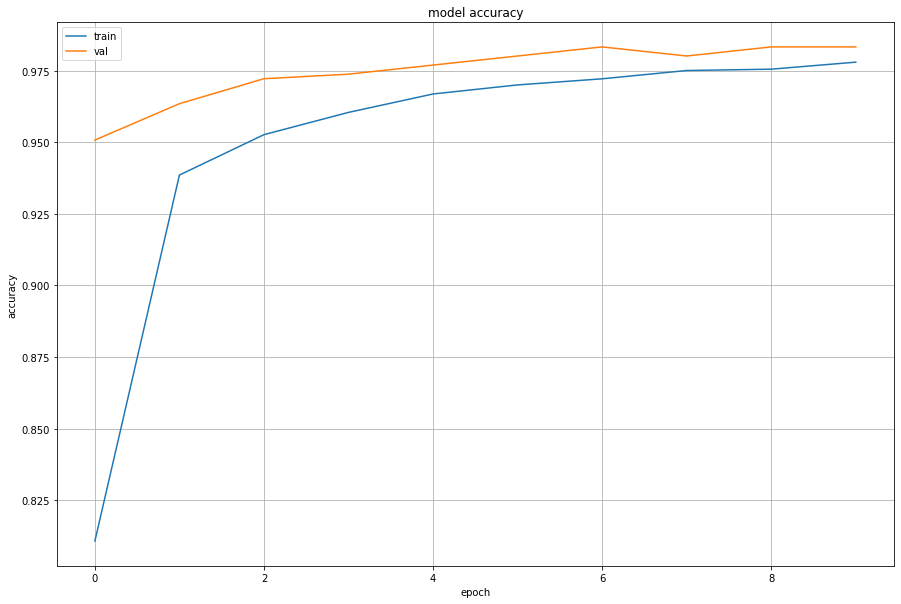

In [15]:
plt.figure(figsize=(15,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

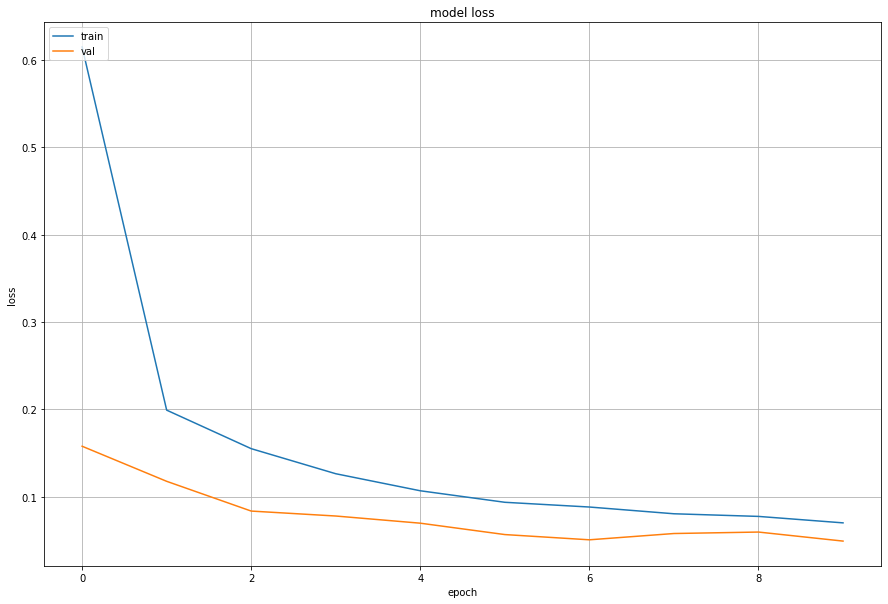

In [16]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

### Check test dataset

In [17]:
#Dataframe test 
df_test = pd.read_csv('test.csv')
X_test = np.array(df_test)

In [18]:
#Normalize dataset
X_test = X_test/255.0
#Reshape images 28*28*1
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [19]:
#Predict test dataset
y_test = model.predict(X_test)

In [20]:
#Check all prob values
y_test[0]

array([1.32497116e-08, 1.49454902e-08, 9.99995947e-01, 3.85390285e-06,
       6.67630812e-11, 7.97354960e-11, 1.79147116e-13, 8.03922688e-08,
       1.41993723e-07, 7.65402020e-10], dtype=float32)

In [21]:
#Check index for max position to get classes
y_test = np.argmax(y_test, axis=1)

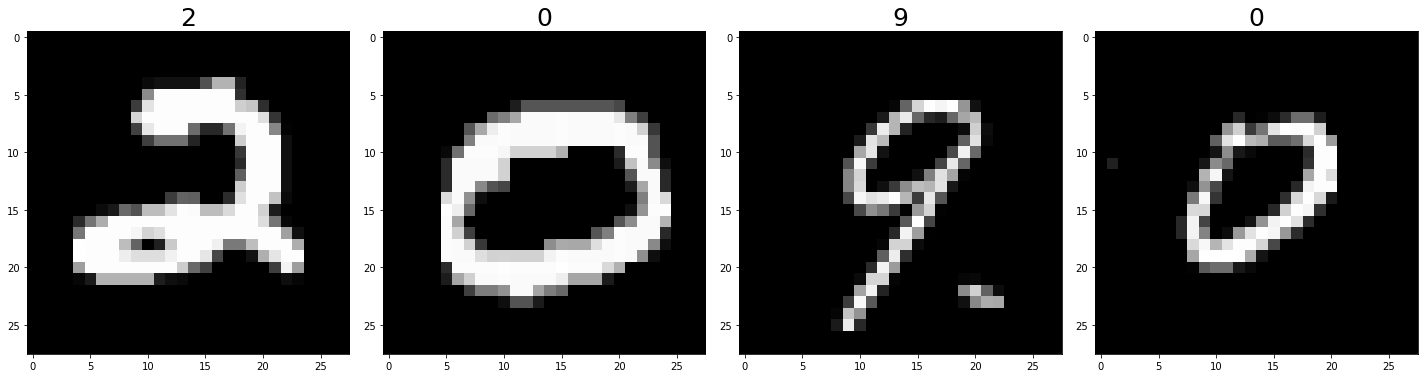

In [22]:
#Plot and check datapoints
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.tight_layout()
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(y_test[i],size = (25))
plt.show()

# Observations 
    * Training accuraracy is 0.9810.
    * training loss is 0.0602.
    * Prediction correct.
    * Works well for MINIST Dataset.
    * Simple and less complex structured conv layer model.